In [1]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# read in our data
earthquakes = pd.read_csv("Data/Earth_database.csv")
landslides = pd.read_csv("Data/catalog.csv")
volcanos = pd.read_csv("Data/Vol_database.csv")

# set seed for reproducibility
np.random.seed(0)
%matplotlib inline 

In [2]:
# print the first few rows of the date column
print(landslides['date'].head())

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


In [9]:
# check the data type of our date column
landslides['date'].dtype

dtype('O')

In [ ]:
landslides['date'].dtype

In [10]:
# Your turn! Check the data type of the Date column in the earthquakes dataframe
# (note the capital 'D' in date!)
earthquakes['Date'].dtype

dtype('O')

In [11]:
# create a new column, date_parsed, with the parsed dates
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format = "%m/%d/%y")

In [12]:
# print the first few rows
landslides['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

What if I run into an error with multiple date formats? 
While we're specifying the date format here, 
sometimes you'll run into an error when there are multiple date formats in a single column. 
If that happens, you have have pandas try to infer what the right date format should be. 
You can do that like so:

In [37]:
#landslides['date_parsed'] = pd.to_datetime(landslides['Date'], infer_datetime_format=True)

Why don't you always use infer_datetime_format = True? There are two big reasons not to always have pandas guess the time format. The first is that pandas won't always been able to figure out the correct date format, especially if someone has gotten creative with data entry. The second is that it's much slower than specifying the exact format of the dates.

In [38]:
# Your turn! Create a new column, date_parsed, in the earthquakes
# dataset that has correctly parsed dates in it. (Don't forget to 
# double-check that the dtype is correct!)

In [13]:
print(earthquakes['Date'].head(10))

0    01/02/1965
1    01/04/1965
2    01/05/1965
3    01/08/1965
4    01/09/1965
5    01/10/1965
6    01/12/1965
7    01/15/1965
8    01/16/1965
9    01/17/1965
Name: Date, dtype: object


In [14]:
# create a new column, date_parsed, with the parsed dates
#earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], format = "%m/%d/%y")
earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], infer_datetime_format=True)

In [15]:
print(earthquakes['date_parsed'].head(10))

0   1965-01-02
1   1965-01-04
2   1965-01-05
3   1965-01-08
4   1965-01-09
5   1965-01-10
6   1965-01-12
7   1965-01-15
8   1965-01-16
9   1965-01-17
Name: date_parsed, dtype: datetime64[ns]


In [16]:
# try to get the day of the month from the date column
day_of_month_landslides = landslides['date'].dt.day

AttributeError: Can only use .dt accessor with datetimelike values

We got an error! The important part to look at here is the part at the very end that says AttributeError: Can only use .dt accessor with datetimelike values. We're getting this error because the dt.day() function doesn't know how to deal with a column with the dtype "object". Even though our dataframe has dates in it, because they haven't been parsed we can't interact with them in a useful way.

Luckily, we have a column that we parsed earlier , and that lets us get the day of the month out no problem:

In [44]:
# get the day of the month from the date_parsed column
day_of_month_landslides = landslides['date_parsed'].dt.day

In [45]:
day_of_month_landslides[:5]

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date_parsed, dtype: float64

Your turn! get the day of the month from the date_parsed column

One of the biggest dangers in parsing dates is mixing up the months and days. The to_datetime() function does have very helpful error messages, but it doesn't hurt to double-check that the days of the month we've extracted make sense.

To do this, let's plot a histogram of the days of the month. We expect it to have values between 1 and 31 and, since there's no reason to suppose the landslides are more common on some days of the month than others, a relatively even distribution. (With a dip on 31 because not all months have 31 days.) Let's see if that's the case:

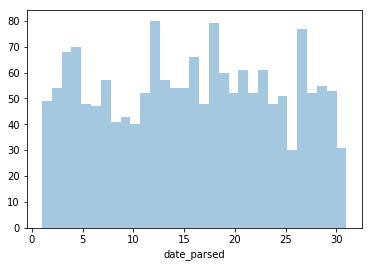

In [46]:
# remove na's
day_of_month_landslides = day_of_month_landslides.dropna()

# plot the day of the month
sns.distplot(day_of_month_landslides, kde=False, bins=31)